# HOUSE PRICE PREDICTION

Import all useful library's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Drop the ID column because it is not going to be used

In [5]:
print('Train data shape before dropping ID: {}'.format(train.shape))
print('Test data shape before dropping ID: {}'.format(test.shape))


train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

print('\nTrain data shape after dropping ID: {}'.format(train.shape))
print('Test data shape after dropping ID: {}'.format(test.shape))

Train data shape before dropping ID: (1460, 81)
Test data shape before dropping ID: (1459, 80)

Train data shape after dropping ID: (1460, 80)
Test data shape after dropping ID: (1459, 79)


# EXPLORING THE DATA<br>

Try to look at the distribution of the target variable, which is target price
<br>
It turns out to be right skewed

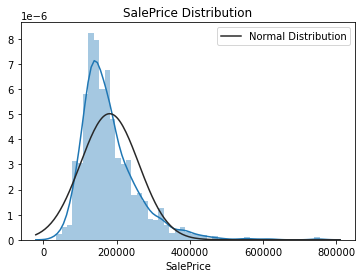

In [6]:
from scipy.stats import norm
sns.distplot(train['SalePrice'], fit=norm)
plt.title('SalePrice Distribution')
plt.legend(['Normal Distribution'], loc='best')

Because it is right skewed, it's probably better to make it normal skewed <br>
For right skewed data, we can use 3 ways to make it normal such as: <br>
-Square root <br>
-Cube root <br>
-Logarithmic <br><br><br>

In this case, logarithmic has the best normal skew and it is closer to the normal distribution. <br>
We are going to use it later during data preprocessing

Text(0.5, 1.0, 'Logarithmic')

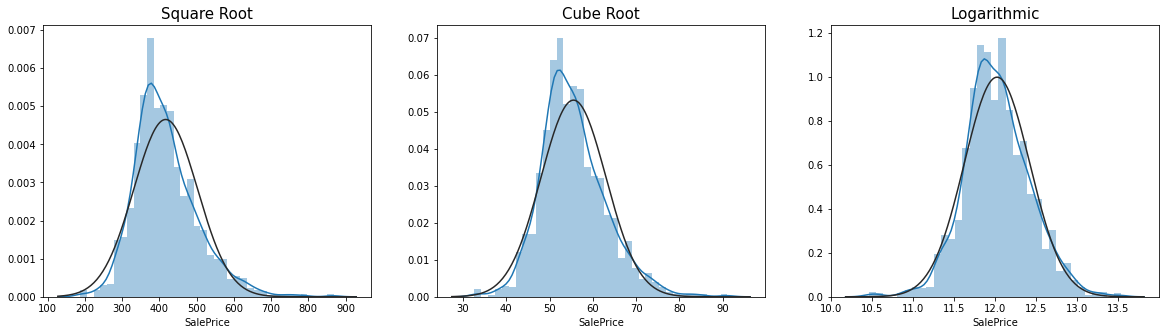

In [7]:
price_sqrt = np.sqrt(train['SalePrice'])
price_cuberoot = np.cbrt(train['SalePrice'])
price_log = np.log1p(train['SalePrice'])

f, ax = plt.subplots(1,3, figsize=(20,5))
sns.distplot(price_sqrt, fit=norm, ax=ax[0])
sns.distplot(price_cuberoot, fit=norm, ax=ax[1])
sns.distplot(price_log, fit=norm, ax=ax[2])

ax[0].set_title('Square Root', fontsize=15)
ax[1].set_title('Cube Root', fontsize=15)
ax[2].set_title('Logarithmic', fontsize=15)

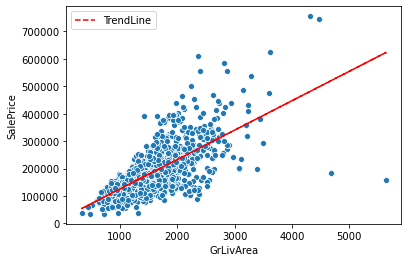

In [8]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

x = train['GrLivArea']
y = train['SalePrice']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.legend(['TrendLine'], loc='best')

# DATA PROCESSING
<br>

# OUTLIER<br>

It seems that there are a few outliers. <br>
We can safely remove them

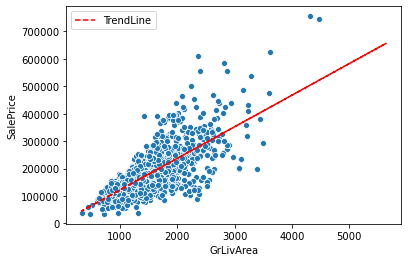

In [9]:
train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index, inplace=True)

sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

z = np.polyfit(train['GrLivArea'], train['SalePrice'], 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.legend(['TrendLine'], loc='best')

# DEALING NULL VALUES<br>

First, lets combine the train and test data to make it easier to fill the missing values both of the data. <br>

In [10]:
ntrain = train.shape[0] #NUMBER OF ROWS FOR TRAIN DATA
ntest = test.shape[0] #NUMBER OF ROWS FOR TEST DATA
y_train = train['SalePrice'].values #KEEP SALEPRICE

allData = pd.concat([train, test]).reset_index(drop=True)
allData.drop('SalePrice', axis=1, inplace=True)

print('Combined train and test data shape: {}'.format(allData.shape))

Combined train and test data shape: (2917, 79)


<br>
Check the total missing value of each column
<br>

In [11]:
total = allData.isnull().sum().sort_values(ascending=False)
percentage = (allData.isnull().sum() / allData.shape[0]).sort_values(ascending=False)
nulls = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
nulls.head(15)

,Total,Percentage
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageCond,159,0.054508
GarageQual,159,0.054508
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508


In [12]:
#FOR NONE VALUE CATEGORICAL
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
for col in cols:
    allData[col].fillna('None', inplace=True)

In [13]:
#FOR LOT FRONTAGE
allData['LotFrontage'] = allData.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [14]:
cols = ['GarageType', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in cols:
    allData[col].fillna('None', inplace=True)

In [15]:
cols = ['GarageYrBlt', 'GarageCars', 'GarageArea']
for col in cols:
    allData[col].fillna(0, inplace=True)

In [16]:
cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
for col in cols:
    allData[col].fillna('None', inplace=True)

In [17]:
cols = ['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']
for col in cols:
    allData[col].fillna(0, inplace=True)

In [18]:
allData['MasVnrArea'].fillna(0, inplace=True)
allData['MasVnrType'].fillna('None', inplace=True)

In [19]:
allData['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
allData['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)
allData['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)
allData['SaleType'].fillna(test['SaleType'].mode()[0], inplace=True)
allData['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)
allData['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)
allData['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)
allData['Functional'].fillna('Typ', inplace=True)

In [20]:
total = allData.isnull().sum().sort_values(ascending=False)
percentage = (allData.isnull().sum() / allData.shape[0]).sort_values(ascending=False)
nulls = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
nulls.head()

,Total,Percentage
SaleCondition,0,0.0
Foundation,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


In [21]:
#MSSubClass = Kelas bangunan
#YrSold = Tahun dijual
cols = ['MSSubClass', 'YrSold']
for col in cols:
    allData[col] = allData[col].astype('str')

# FEATURE ENGINEERING<br>

<br>
Lets start with label encoding.<br><br>
These columns are given label encoding instead of one hot encoding because they represent some kind of order for either good condition or bad condition

In [22]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold')

for col in cols:
    label = LabelEncoder()
    label.fit(list(allData[col].values))
    allData[col] = label.transform(list(allData[col].values))
    
print('Shape of data: {}'.format(allData.shape))

Shape of data: (2917, 79)


<br>
Check for other numerical value skewness.<br><br>
It might help to make better accuracy for our prediction later

In [23]:
numeric = allData.dtypes[allData.dtypes != 'object'].index

from scipy.stats import skew
skew_feats = allData[numeric].apply(lambda x : skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skew_feats, columns=['Skew'])
skewness.head(5)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080


In [24]:
skewness = skewness[abs(skewness) > 0.75]
print('Total of highly skewed features: {}'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    allData[feat] = boxcox1p(allData[feat], lam)

Total of highly skewed features: 58


<br>I dropped utilities here because it seems that it only has 1 type of utilities so its pretty safe to drop it<br>

In [25]:
print('Shape of data before dropping utilities: {}'.format(allData.shape))

allData.drop('Utilities', axis=1, inplace=True)

print('\nShape of data after dropping utilities: {}'.format(allData.shape))

Shape of data before dropping utilities: (2917, 79)

Shape of data after dropping utilities: (2917, 78)


Now, more feature engineering with categorical columns. <br><br>
For other categorical columns, we can use one hot encoding.

In [26]:
print('Shape of data before one hot encoding: {}'.format(allData.shape))

allData = pd.get_dummies(allData)

print('Shape of data after one hot encoding: {}'.format(allData.shape))

Shape of data before one hot encoding: (2917, 78)
Shape of data after one hot encoding: (2917, 219)


In [27]:
y_train = pd.DataFrame(y_train, columns=['SalePrice'])
train = pd.concat([allData[:ntrain], y_train], axis=1)
test = allData[ntrain:]

print('New train data shape: {}'.format(train.shape))
print('New test data shape: {}'.format(test.shape))

New train data shape: (1458, 220)
New test data shape: (1459, 219)


In [28]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# DATA PROCESSING<br>

Lets try to only use a few algorithm model<br><br>

-Logistic Regression<br>
-Random Forest Regressor<br>
-Gradient Boosting Regressor<br>

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

In [30]:
lr = make_pipeline(RobustScaler(), LogisticRegression(max_iter=300))
lr.fit(X, y)
predict_lr = lr.predict(test)
print(lr.score(X, y))

0.9238683127572016


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
rfr = RandomForestRegressor()
rfr.fit(X, y)
predict_rfr = rfr.predict(test)
print(rfr.score(X, y))

0.9842353185296623


In [32]:
gbr = GradientBoostingRegressor()
gbr.fit(X, y)
predict_gbr = gbr.predict(test)
print(gbr.score(X, y))

0.9693757051669675


<br>Lets try to tune the hyperparameter for each algorithm<br><br>
We expect to have slight better accuracy

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Text(0.5, 1.0, 'Logistic Regression Max Iteration')

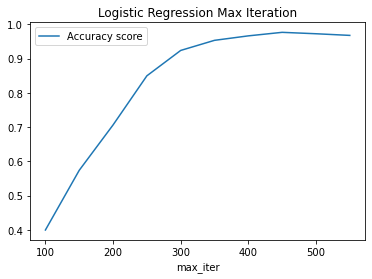

In [33]:
rfc_results = []
for i in range(100, 600, 50):
    lr = make_pipeline(RobustScaler(), LogisticRegression(max_iter=i))
    lr.fit(X, y)
    predict_lr = lr.predict(test)
    rfc_results.append({
        'max_iter' : i,
        'Accuracy score' : lr.score(X, y)
    })

pd.DataFrame(rfc_results).set_index('max_iter').plot()
plt.title('Logistic Regression Max Iteration')

Text(0.5, 1.0, 'Random Forest Regressor Max Iteration')

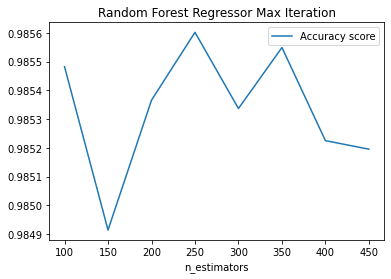

In [34]:
rfr_results = []
for i in range(100, 500, 50):
    rfr = RandomForestRegressor(n_estimators=i)
    rfr.fit(X, y)
    predict_rfr = rfr.predict(test)
    rfr_results.append({
        'n_estimators' : i,
        'Accuracy score' : rfr.score(X, y)
    })

pd.DataFrame(rfr_results).set_index('n_estimators').plot()
plt.title('Random Forest Regressor Max Iteration')

Text(0.5, 1.0, 'Gradient Boosting Regressor Max Iteration')

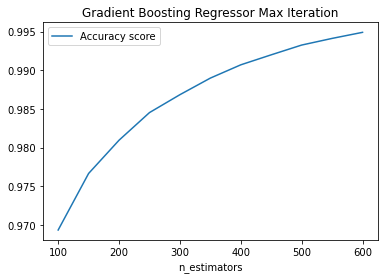

In [35]:
gbr_results = []
for i in range(100, 650, 50):
    gbr = GradientBoostingRegressor(n_estimators=i)
    gbr.fit(X, y)
    predict_gbr = gbr.predict(test)
    gbr_results.append({
        'n_estimators' : i,
        'Accuracy score' : gbr.score(X, y)
    })

pd.DataFrame(gbr_results).set_index('n_estimators').plot()
plt.title('Gradient Boosting Regressor Max Iteration')

As we can see, gradient boosing regressor has the best accuracy score.<br>
From the plot, we can see that when its n_estimators higher, the accuracy score will also get higher